In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('/kaggle/input/d/jochein/bankdata/bank/bank.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [4]:
df["y"] = df["y"].astype("category")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        4521 non-null   int64   
 1   job        4521 non-null   object  
 2   marital    4521 non-null   object  
 3   education  4521 non-null   object  
 4   default    4521 non-null   object  
 5   balance    4521 non-null   int64   
 6   housing    4521 non-null   object  
 7   loan       4521 non-null   object  
 8   contact    4521 non-null   object  
 9   day        4521 non-null   int64   
 10  month      4521 non-null   object  
 11  duration   4521 non-null   int64   
 12  campaign   4521 non-null   int64   
 13  pdays      4521 non-null   int64   
 14  previous   4521 non-null   int64   
 15  poutcome   4521 non-null   object  
 16  y          4521 non-null   category
dtypes: category(1), int64(7), object(9)
memory usage: 569.8+ KB


In [6]:
df.describe(include=['category'])

,y
count,4521
unique,2
top,no
freq,4000


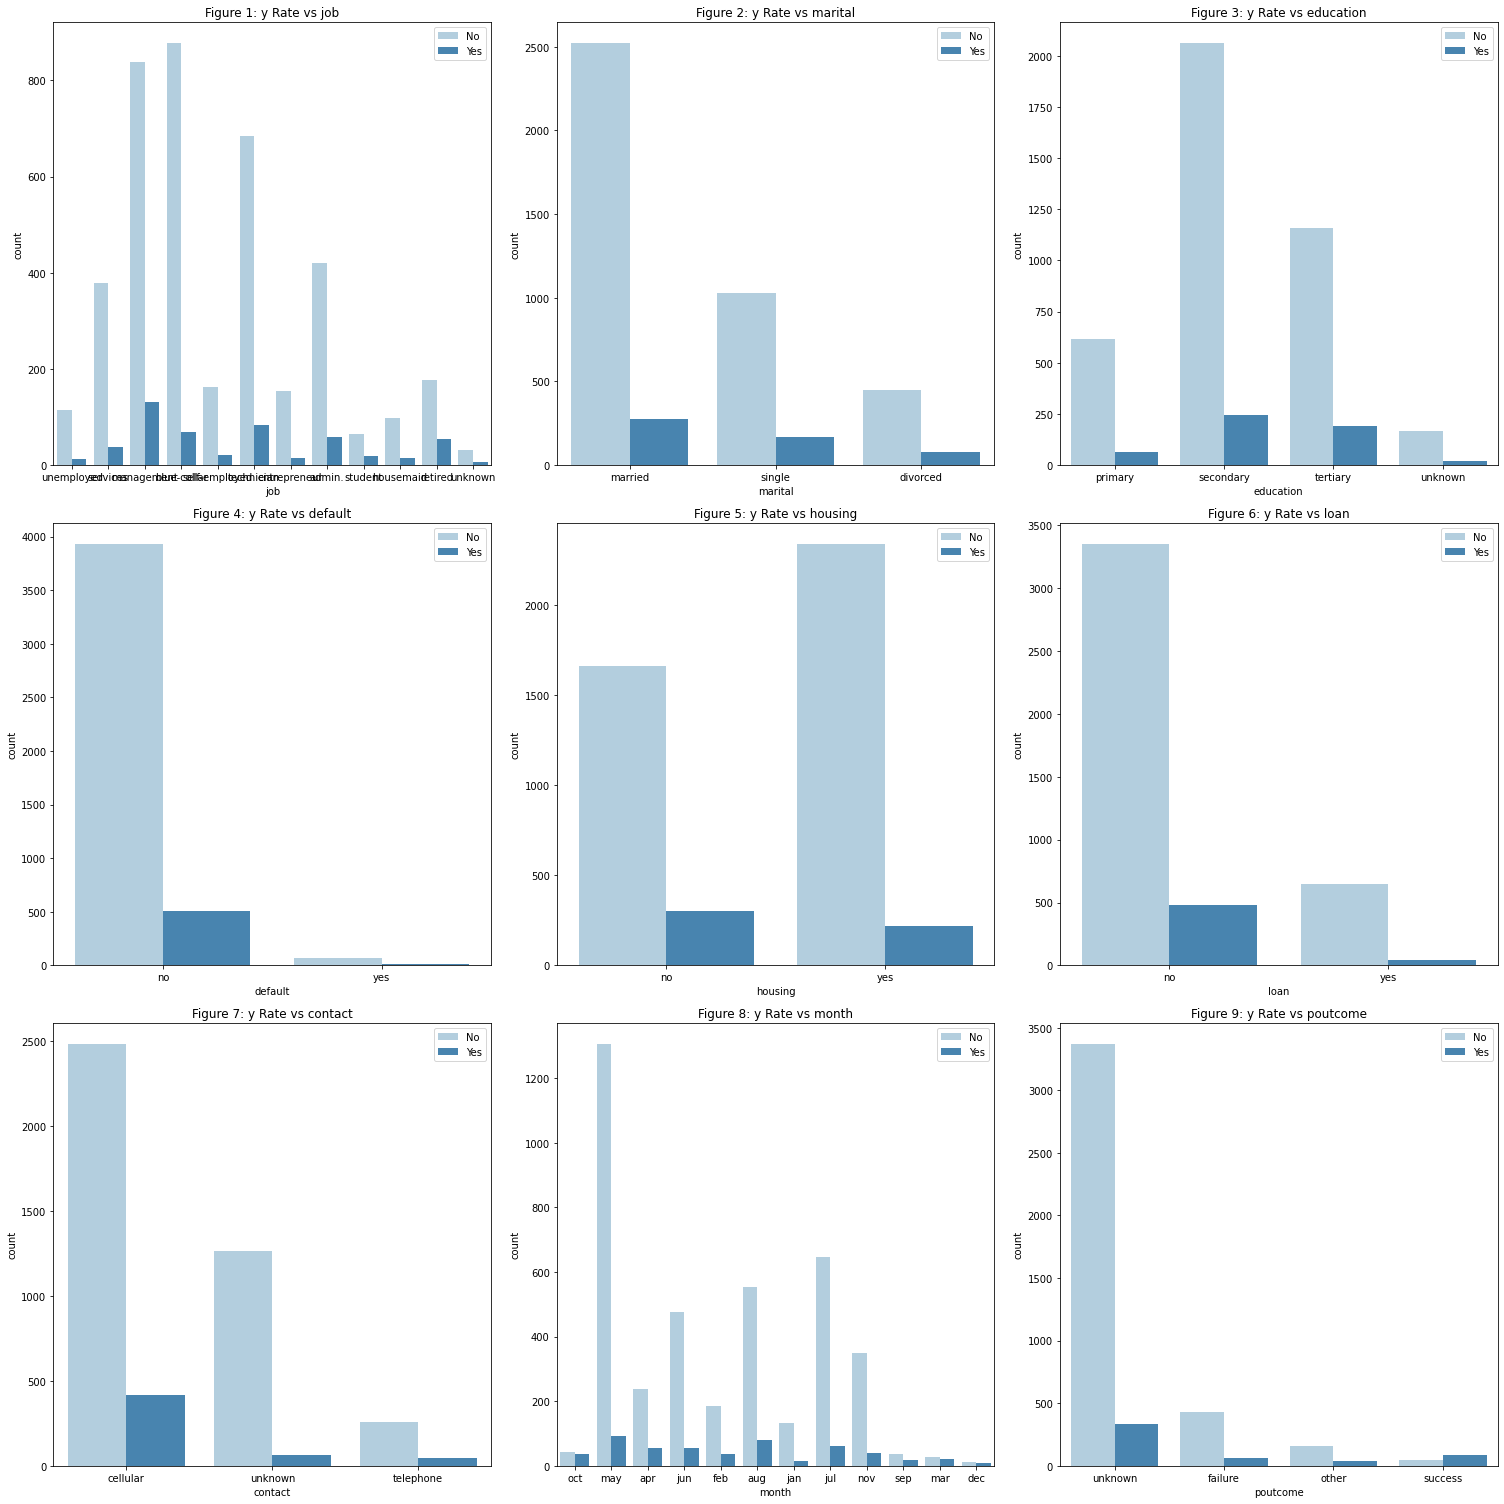

In [7]:
cols = [ 'job', 'marital', 'education', 'default','housing','loan','contact','month','poutcome']

n_rows = 3
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*7, n_rows*7))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c #index to loop through list "cols"
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=df, x=cols[i], hue="y", palette="Blues", ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: y Rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

In [8]:
df=df.drop(['day','month'],axis='columns')
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,129,4,211,3,other,no


In [9]:
df['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [10]:
df['job'].value_counts(normalize=True).to_frame()

,job
management,0.214333
blue-collar,0.209246
technician,0.169874
admin.,0.105729
services,0.092236
retired,0.050874
self-employed,0.040478
entrepreneur,0.037160
unemployed,0.028312
housemaid,0.024773


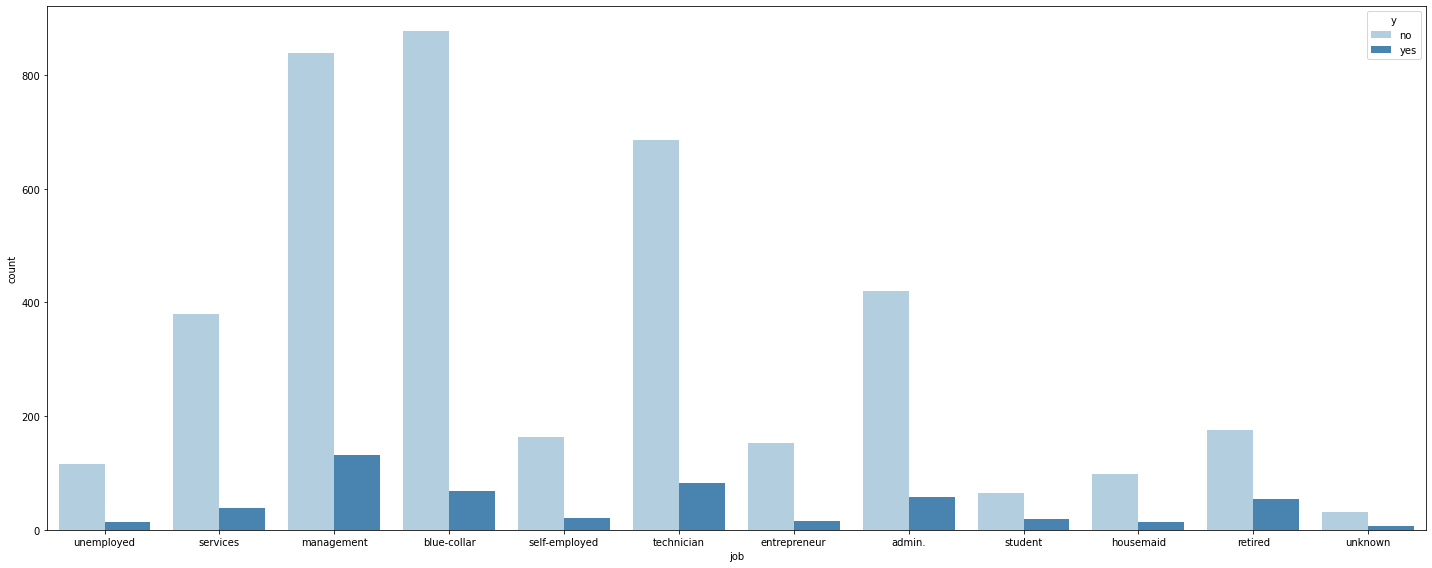

In [11]:
fix, axes = plt.subplots(nrows =1,ncols=1,figsize=(20,8))
sns.countplot(data=df, x='job', hue='y', palette='Blues');
plt.tight_layout()

In [12]:
df=df.drop(['job'],axis='columns')
df

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
1,33,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no
2,35,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no
3,30,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,married,secondary,no,-333,yes,no,cellular,329,5,-1,0,unknown,no
4517,57,married,tertiary,yes,-3313,yes,yes,unknown,153,1,-1,0,unknown,no
4518,57,married,secondary,no,295,no,no,cellular,151,11,-1,0,unknown,no
4519,28,married,secondary,no,1137,no,no,cellular,129,4,211,3,other,no


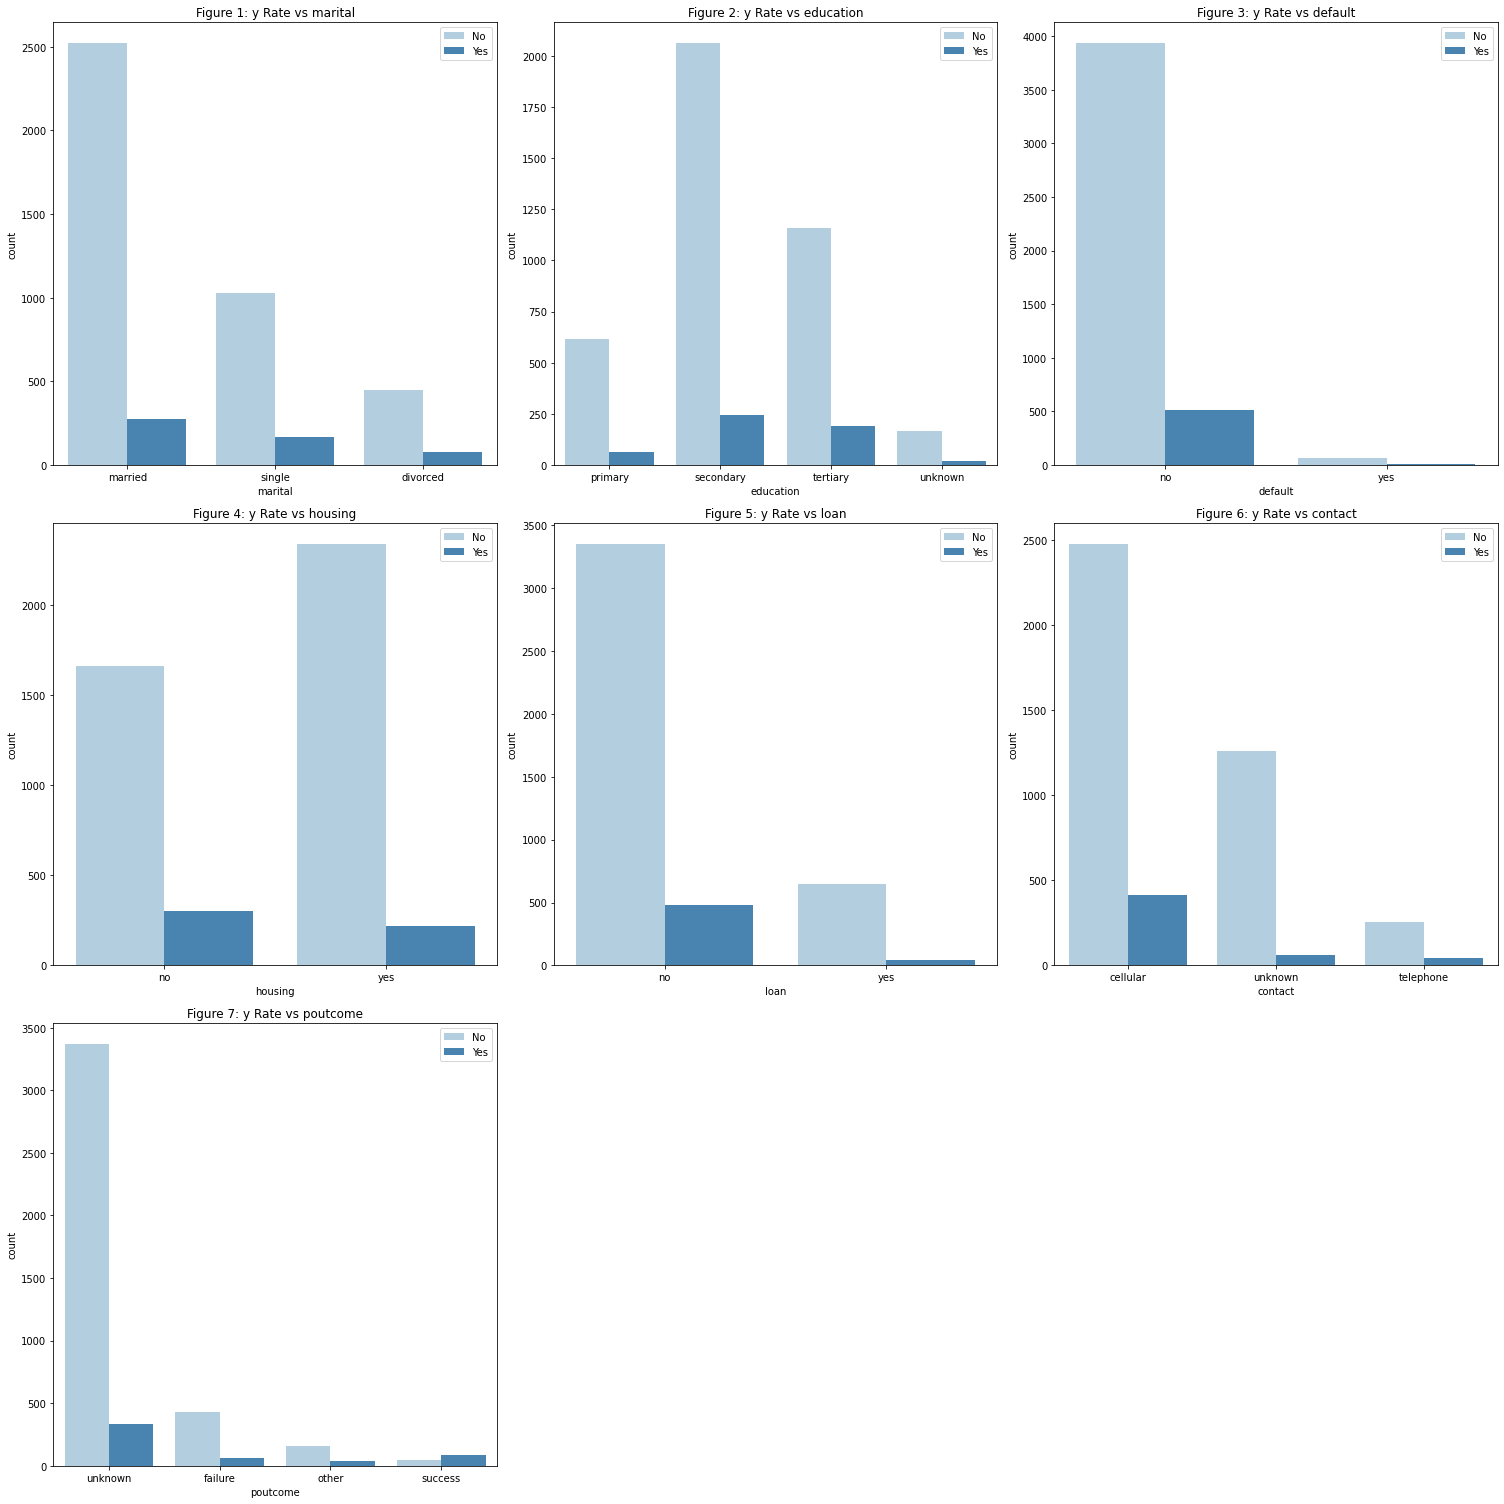

In [13]:
cols = [ 'marital', 'education', 'default','housing','loan','contact','poutcome']

n_rows = 3
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*7, n_rows*7))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c #index to loop through list "cols"
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=df, x=cols[i], hue="y", palette="Blues", ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: y Rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['No', 'Yes'])
ax.flat[-1].set_visible(False) 
ax.flat[-2].set_visible(False) 
plt.tight_layout()
plt.show()

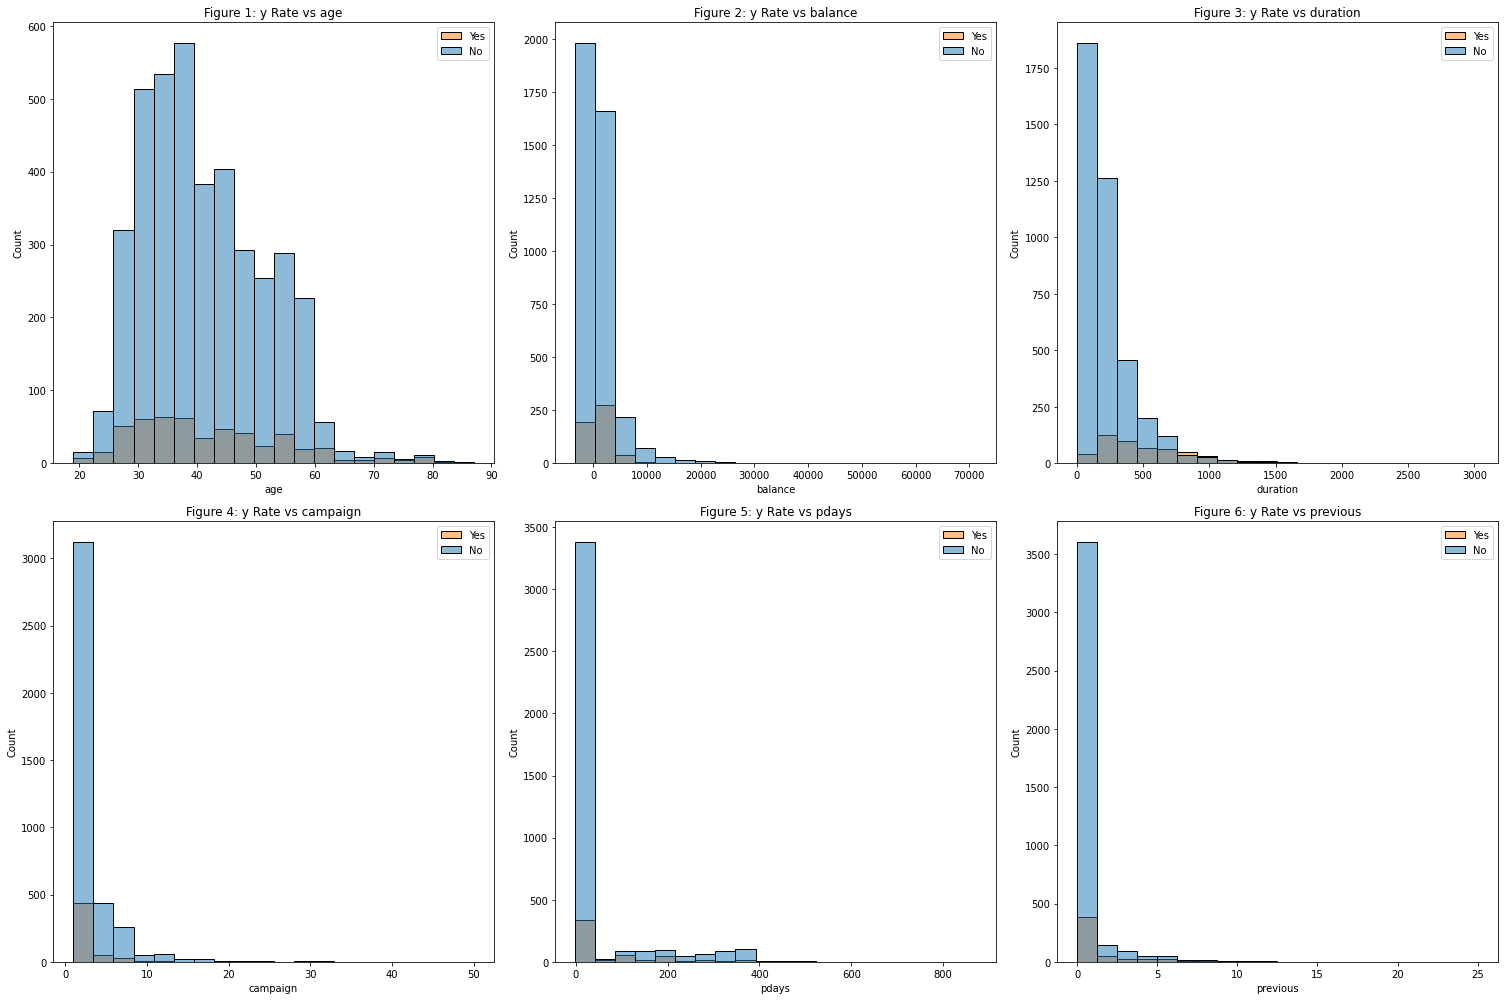

In [14]:
cols = ['age','balance','duration','campaign','pdays','previous']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*7, n_rows*7))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c 
        if i < len(cols):
            ax_i = ax[r,c]
            sns.histplot(data=df, x=cols[i], hue='y' ,bins = 20, ax=ax_i);
            ax_i.set_title(f"Figure {i+1}: y Rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['Yes', 'No'])
            
plt.tight_layout()
plt.show()

In [15]:
from scipy import stats
df = df[(np.abs(stats.zscore(df[['age','balance','duration','campaign','pdays','previous']])) < 2).all(axis=1)]
df

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
3,30,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no
5,35,single,tertiary,no,747,no,no,cellular,141,2,176,3,failure,no
7,39,married,secondary,no,147,yes,no,cellular,151,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,married,secondary,no,1205,yes,no,cellular,45,4,153,1,failure,no
4515,32,single,secondary,no,473,yes,no,cellular,624,5,-1,0,unknown,no
4516,33,married,secondary,no,-333,yes,no,cellular,329,5,-1,0,unknown,no
4517,57,married,tertiary,yes,-3313,yes,yes,unknown,153,1,-1,0,unknown,no


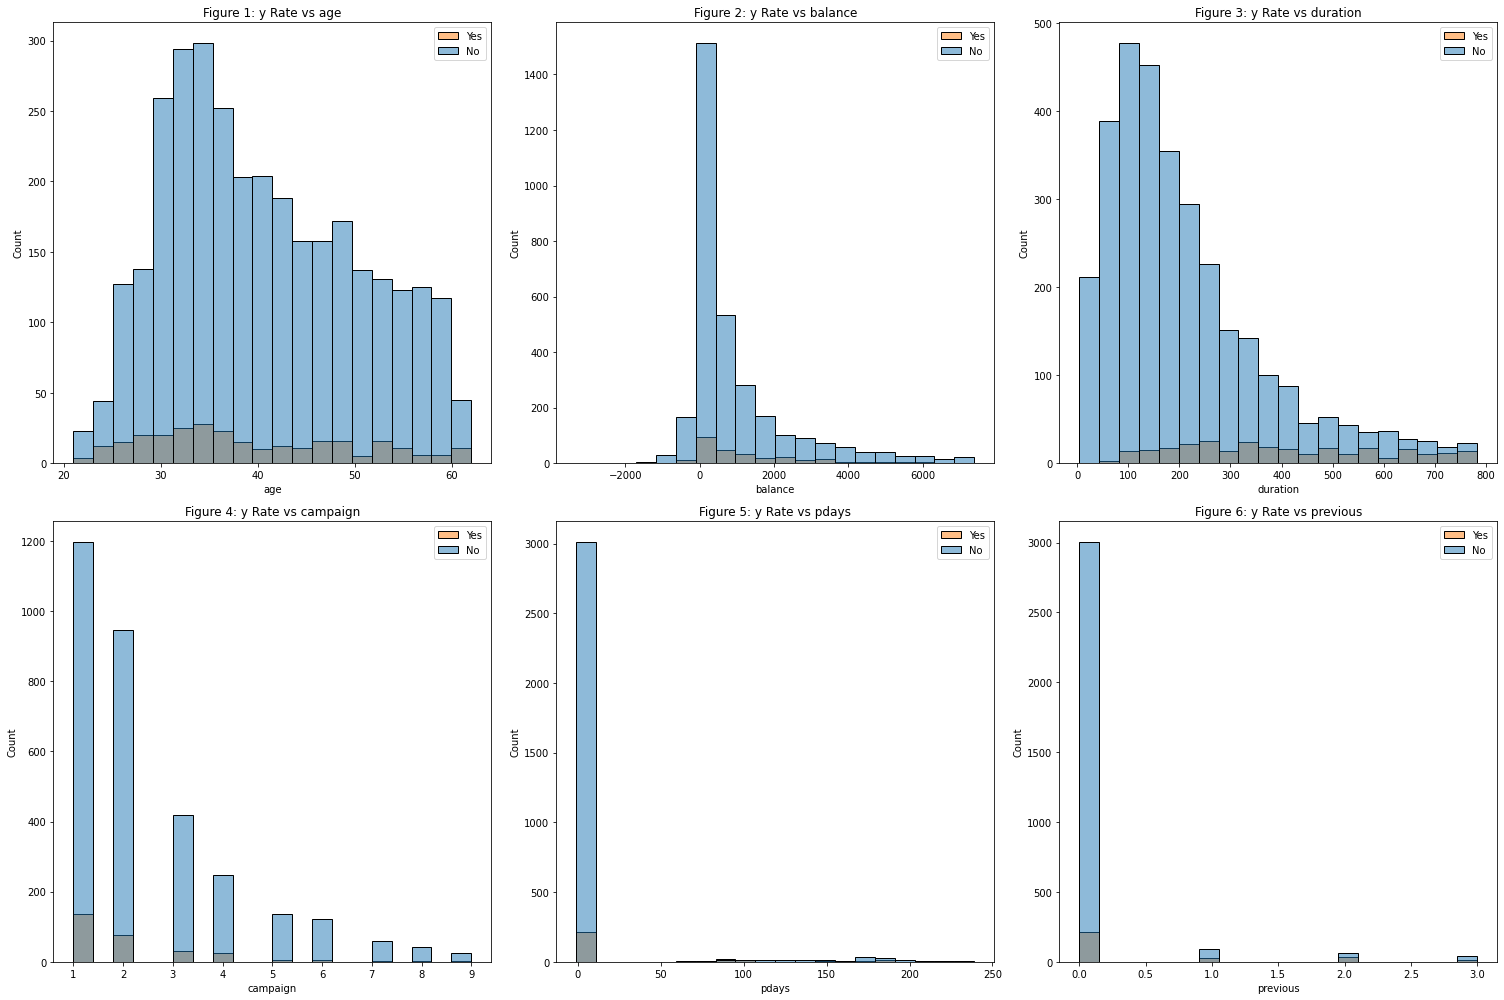

In [16]:
cols = ['age','balance','duration','campaign','pdays','previous']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*7, n_rows*7))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c 
        if i < len(cols):
            ax_i = ax[r,c]
            sns.histplot(data=df, x=cols[i], hue='y' ,bins = 20, ax=ax_i);
            ax_i.set_title(f"Figure {i+1}: y Rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['Yes', 'No'])
            
plt.tight_layout()
plt.show()

In [17]:
df

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
3,30,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no
5,35,single,tertiary,no,747,no,no,cellular,141,2,176,3,failure,no
7,39,married,secondary,no,147,yes,no,cellular,151,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,married,secondary,no,1205,yes,no,cellular,45,4,153,1,failure,no
4515,32,single,secondary,no,473,yes,no,cellular,624,5,-1,0,unknown,no
4516,33,married,secondary,no,-333,yes,no,cellular,329,5,-1,0,unknown,no
4517,57,married,tertiary,yes,-3313,yes,yes,unknown,153,1,-1,0,unknown,no


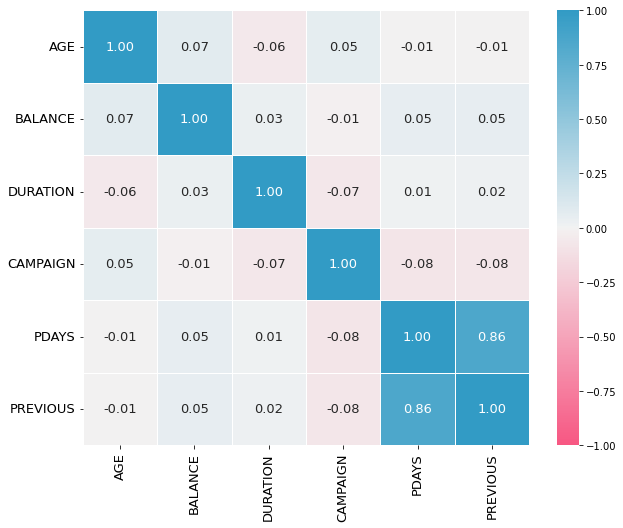

In [18]:
ele = ['age','balance','duration','campaign','pdays','previous']
cereal_df_new = df[ele]
cereal_corr = cereal_df_new.corr()

fig, ax = plt.subplots(figsize=(10,8))


#That method uses HUSL colors, so you need hue, saturation, and lightness. 
#I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=cereal_corr,
            annot=True, annot_kws={"fontsize":13}, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1,
            linecolor='white', linewidths=0.5);

yticks = [i.upper() for i in cereal_corr.index]
xticks = [i.upper() for i in cereal_corr.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=13);
ax.set_xticklabels(xticks, rotation=90, fontsize=13);

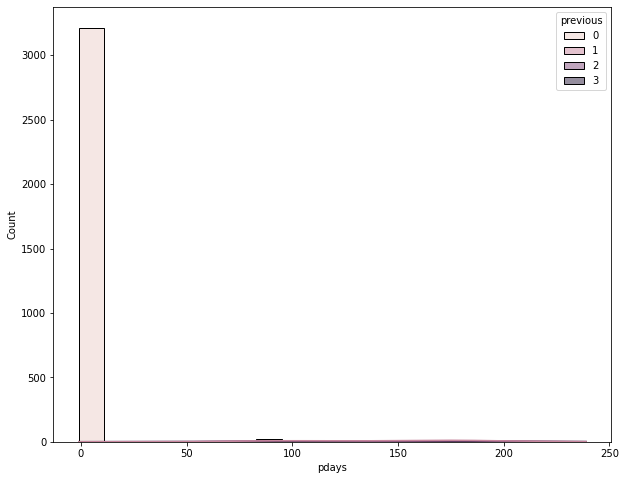

In [19]:
fix, axes = plt.subplots(nrows =1,ncols=1,figsize=(10,8))
sns.histplot(data=df, x='pdays', hue='previous' ,bins = 20,kde=True);

In [20]:
df

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
3,30,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no
5,35,single,tertiary,no,747,no,no,cellular,141,2,176,3,failure,no
7,39,married,secondary,no,147,yes,no,cellular,151,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,married,secondary,no,1205,yes,no,cellular,45,4,153,1,failure,no
4515,32,single,secondary,no,473,yes,no,cellular,624,5,-1,0,unknown,no
4516,33,married,secondary,no,-333,yes,no,cellular,329,5,-1,0,unknown,no
4517,57,married,tertiary,yes,-3313,yes,yes,unknown,153,1,-1,0,unknown,no


In [21]:
from sklearn.preprocessing import LabelEncoder
cols = ['poutcome','default','housing','loan','y']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,married,primary,0,1787,0,0,cellular,79,1,-1,0,3,0
3,30,married,tertiary,0,1476,1,1,unknown,199,4,-1,0,3,0
4,59,married,secondary,0,0,1,0,unknown,226,1,-1,0,3,0
5,35,single,tertiary,0,747,0,0,cellular,141,2,176,3,0,0
7,39,married,secondary,0,147,1,0,cellular,151,2,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,married,secondary,0,1205,1,0,cellular,45,4,153,1,0,0
4515,32,single,secondary,0,473,1,0,cellular,624,5,-1,0,3,0
4516,33,married,secondary,0,-333,1,0,cellular,329,5,-1,0,3,0
4517,57,married,tertiary,1,-3313,1,1,unknown,153,1,-1,0,3,0


In [22]:
df =pd.get_dummies(df, columns = ['marital', 'education','contact'])
df

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,30,0,1787,0,0,79,1,-1,0,3,...,0,1,0,1,0,0,0,1,0,0
3,30,0,1476,1,1,199,4,-1,0,3,...,0,1,0,0,0,1,0,0,0,1
4,59,0,0,1,0,226,1,-1,0,3,...,0,1,0,0,1,0,0,0,0,1
5,35,0,747,0,0,141,2,176,3,0,...,0,0,1,0,0,1,0,1,0,0
7,39,0,147,1,0,151,2,-1,0,3,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,0,1205,1,0,45,4,153,1,0,...,0,1,0,0,1,0,0,1,0,0
4515,32,0,473,1,0,624,5,-1,0,3,...,0,0,1,0,1,0,0,1,0,0
4516,33,0,-333,1,0,329,5,-1,0,3,...,0,1,0,0,1,0,0,1,0,0
4517,57,1,-3313,1,1,153,1,-1,0,3,...,0,1,0,0,0,1,0,0,0,1


In [23]:
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_cellular', 'contact_telephone', 'contact_unknown'],
      dtype='object')

In [24]:
df = df.drop(['marital_single','education_unknown','contact_unknown'],axis='columns')
df

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y,marital_divorced,marital_married,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone
0,30,0,1787,0,0,79,1,-1,0,3,0,0,1,1,0,0,1,0
3,30,0,1476,1,1,199,4,-1,0,3,0,0,1,0,0,1,0,0
4,59,0,0,1,0,226,1,-1,0,3,0,0,1,0,1,0,0,0
5,35,0,747,0,0,141,2,176,3,0,0,0,0,0,0,1,1,0
7,39,0,147,1,0,151,2,-1,0,3,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,0,1205,1,0,45,4,153,1,0,0,0,1,0,1,0,1,0
4515,32,0,473,1,0,624,5,-1,0,3,0,0,0,0,1,0,1,0
4516,33,0,-333,1,0,329,5,-1,0,3,0,0,1,0,1,0,1,0
4517,57,1,-3313,1,1,153,1,-1,0,3,0,0,1,0,0,1,0,0


In [25]:
df['p'] = df['pdays'] + df['previous']
df=df.drop(['pdays','previous'],axis='columns')
df

,age,default,balance,housing,loan,duration,campaign,poutcome,y,marital_divorced,marital_married,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,p
0,30,0,1787,0,0,79,1,3,0,0,1,1,0,0,1,0,-1
3,30,0,1476,1,1,199,4,3,0,0,1,0,0,1,0,0,-1
4,59,0,0,1,0,226,1,3,0,0,1,0,1,0,0,0,-1
5,35,0,747,0,0,141,2,0,0,0,0,0,0,1,1,0,179
7,39,0,147,1,0,151,2,3,0,0,1,0,1,0,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,0,1205,1,0,45,4,0,0,0,1,0,1,0,1,0,154
4515,32,0,473,1,0,624,5,3,0,0,0,0,1,0,1,0,-1
4516,33,0,-333,1,0,329,5,3,0,0,1,0,1,0,1,0,-1
4517,57,1,-3313,1,1,153,1,3,0,0,1,0,0,1,0,0,-1


In [26]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"{col} has {missing_count*100/n_rows:.2f}% missing values.")
display_missing(df, df.columns)

In [27]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = df[['balance', 'duration','p']]

scaledX = scale.fit_transform(X)

print(scaledX)

[[ 0.5586226  -0.86462921 -0.26916616]
 [ 0.34633204 -0.15342743 -0.26916616]
 [-0.6611949   0.00659296 -0.26916616]
 ...
 [-0.88850281  0.61704115 -0.26916616]
 [-2.92266966 -0.42605478 -0.26916616]
 [ 0.11492849 -0.56829514  5.00007262]]


In [28]:
X_train =df.drop(['y'],axis='columns')
y_train = df['y']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.2)

In [30]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [31]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:05<00:00,  5.57it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.79,0.77,0.77,0.83,0.02
ExtraTreeClassifier,0.89,0.69,0.69,0.90,0.02
GaussianNB,0.88,0.68,0.68,0.89,0.02
QuadraticDiscriminantAnalysis,0.89,0.67,0.67,0.89,0.03
LGBMClassifier,0.93,0.66,0.66,0.92,0.16
BaggingClassifier,0.93,0.64,0.64,0.92,0.08
LabelPropagation,0.89,0.64,0.64,0.90,0.28
LabelSpreading,0.89,0.64,0.64,0.90,0.39
XGBClassifier,0.92,0.64,0.64,0.91,1.55
